In [14]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"

import pandas as pd                                 # Data Frame

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced data visualisation

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/jdecorte/machinelearning/main/datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Scaling en data voorbereiden

Deze dataset geeft mee of een bepaalde persoon een hartziekte heeft ontwikkeld. Dit wordt meegegeven met de `target` variabele. Dit zal de waarde vormen die we willen voorspellen.
De waarde moet gescaled worden, maar dit mag enkel op de X gebeuren. De labels mogen niet worden verandert dus we gaan eerst kijken om de X en Y te bemachtigen. Daarna veranderen we de X met minmaxscaler.

We moeten drie instanties bijhouden van X:
* Voor de minmaxscaling: We hebben de kolommen nodig wanneer we de data weer in de dataset gaan plaatsen.
* Na de minmaxscaling als NumPy array.
* Na de volledige transformatie.

In [16]:
X_pre = df.drop('target', axis=1)
y = df['target']

In [17]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X_sc = mm_scaler.fit_transform(X_pre)

In [18]:
X_transformed = pd.DataFrame(X_sc, columns=X_pre.columns)
X_transformed.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


Nu kunnen we de dataset gaan opsplitsen in een training- en een testset.

In [19]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=42)    # default test size = 0.25

In [25]:
print(f'Shape: {X_train.shape}')
print(f'Shape: {X_test.shape}')
print(f'Shape: {y_train.shape}')
print(f'Shape: {y_test.shape}')

Shape: (768, 13)
Shape: (257, 13)
Shape: (768,)
Shape: (257,)


## SGDClassifier en cross-validatie

We kunnen de classificatie op verschillende manieren doen. Tot nu toe hebben we enkel de SGDClassifier gezien. Deze classifier gaan we toepassen op de dataset.

1. We maken het object aan. De classifier gaan we gaan fitten op basis van de X_train en y_train.
2. We gaan een voorspelling maken op basis van de testdata. Deze voorspelde labels gaan we opslaan onder y_predict.
3. Hoe nauwkeurig is de voorspelling? We vergelijken de voorspelde waarden met de eigenlijke waarden uit y.

In [26]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [27]:
y_predict = sgd_clf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predict)
print(f'{acc:.2%}')

77.04%


In [38]:
from sklearn.model_selection import cross_val_score
for k in range(2, 11):
    score = cross_val_score(sgd_clf, X_train, y_train, cv=k, scoring='accuracy')
    print(f'K is {k}\n met een accuracy van {np.mean(score):.2%}')

K is 2
 met een accuracy van 83.72%
K is 3
 met een accuracy van 84.77%
K is 4
 met een accuracy van 80.21%
K is 5
 met een accuracy van 81.65%
K is 6
 met een accuracy van 83.46%
K is 7
 met een accuracy van 83.46%
K is 8
 met een accuracy van 83.98%
K is 9
 met een accuracy van 82.94%
K is 10
 met een accuracy van 82.93%


Hieronder werken we LOOCV uit. Dit is een manier waarbij we één observatie uit de dataset gaan uitlaten. Op deze manier kunnen we de response value gaan bepalen van de observatie die we naast hebben laten liggen. Dit wordt herhaald voor iedere observatie in de dataset.

In [41]:
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()
scores = cross_val_score(sgd_clf, X_train, y_train, cv=cv, scoring='accuracy')
print(f'Het gemiddelde in het geval van LOOCV is {np.mean(scores):.2%}')

Het gemiddelde in het geval van LOOCV is 83.59%


## Confusion matrix

Hieronder stellen we de confusion matrix op. We berekenen de bijhorende precisie en recall van het model.
* Precisie: Het % van mensen waarvan we zeggen dat ze een hartziekte zullen krijgen, die er effectief een hebben.
* Recall: Het % van mensen met een hartziekte die wij ook effectief detecteren.

Text(91.68, 0.5, 'Actual class')

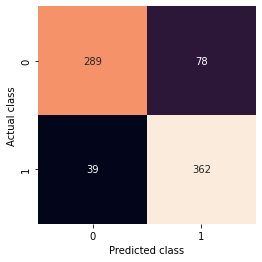

In [61]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
labels = ['0','1']
cf = sns.heatmap(conf_mx,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
cf.set_xlabel('Predicted class')
cf.set_ylabel('Actual class')

In [43]:
TN = conf_mx[0][0]
FN = conf_mx[1][0]
FP = conf_mx[0][1]
TP = conf_mx[1][1]

print(f"TN = {TN} \nFN = {FN} \nFP = {FP} \nTP = {TP}")

TN = 289 
FN = 39 
FP = 78 
TP = 362


In [46]:
from sklearn.metrics import precision_score, recall_score
print(f"The precision is: {precision_score(y_train, y_train_pred):.2%}")
print(f"The recall is: {recall_score(y_train, y_train_pred):.2%}")

The precision is: 82.27%
The recall is: 90.27%


De F1-score is een harmonieus gemiddelde van de precisie en recall. We kunnen afleiden dat we een nauwkeurigheid hebben van 86.09% met ons model. Dit zou betekenen dat we in ~14% van de gevallen een foute diagnose zouden stellen. Wij maken ons vooral zorgen over de `False Negatives`. Dit zou betekenen dat we iemand de diagnose geven van géén hartziekte terwijl die er wel één zou krijgen (of al heeft).

In [48]:
from sklearn.metrics import f1_score
print(f"F1 is: {f1_score(y_train, y_train_pred):.2%}")

F1 is: 86.09%


We willen graag nu een plot hebben waarop we de recall en precisie tegenover elkaar plaatsen. We willen de threshold zien van deze twee waarden, zodat we deze kunnen aanpassen naar een waarde die ons gunstigere resultaten oplevert.
1. We moeten de scores van alle instanties ophalen in de trainingset met cross_val_predict. Nu willen we de decision_scores opvragen.
2. Met deze scores kunnen we de precisie en de recall opvragen voor alle mogelijke thresholds.
3. Als laatst plotten we deze curve.

In [49]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

In [50]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

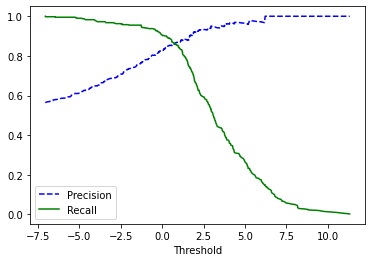

In [51]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.legend(loc="lower left")
  plt.xlabel("Threshold")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Nu hebben we een beter zicht op welke waarde we kunnen kiezen voor de threshold. De threshold gaan we plaatsen op ongeveer 1.0 verwijderd van de plaats waar de recall begint te dalen. Om de `recall te verhogen` moeten wij de `valse negatieven verminderen`. Dit zal het gevolg hebben dat onze precisie zal dalen.

1. We kunnen de arrays van thresholds, recalls en precisions opvragen. Als we kijken naar de laatste twintig waarden van de recalls zien we het percentage van 95%. We willen de index weten van het percentage dat het dichtst bij 95% ligt.
2. We vragen alle scores van y op die boven de thresholds liggen.
3. We berekenen de precision score op basis van de waarden uit de trainingset en de y-labels die we zonet hebben opgehaald.

In [56]:
threshold_95_recall = thresholds[np.argmax(recalls <= 0.95)]

In [57]:
y_train_pred_95 = (y_scores >= threshold_95_recall)

In [58]:
print(f"The precision is: {precision_score(y_train, y_train_pred_95)}")
print(f"The recall is: {recall_score(y_train, y_train_pred_95)}")

The precision is: 0.7645875251509054
The recall is: 0.9476309226932669


Nu tonen we de nieuwe confusion matrix. De recall is aanzienlijk verminderd, maar dit ten gevolge van de precision die gestegen is.

Text(91.68, 0.5, 'Actual class')

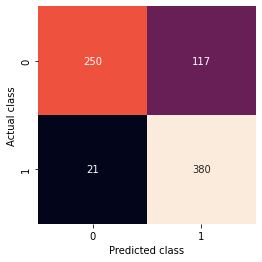

In [60]:
conf_mx = confusion_matrix(y_train, y_train_pred_95)
labels = ['0','1']
cf = sns.heatmap(conf_mx,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
cf.set_xlabel('Predicted class')
cf.set_ylabel('Actual class')

## ROC-curve

Met de ROC-curve hebben we een zicht op de TP-rate (recall) tegenover de FP-rate. 
1. We berekenen de TP-rate en de FP-rate.
2. We plotten de ROC-curve. Hoe ver de curve ligt van de rechte lijn, hoe beter ons model.
3. We berekenen de AUC (= Area under curve) score.

In [63]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

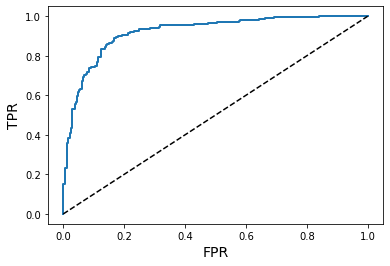

In [65]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.xlabel("FPR", fontsize=14)
  plt.ylabel("TPR", fontsize=14)

plot_roc_curve(fpr, tpr)

In [67]:
from sklearn.metrics import roc_auc_score
print(f"The ROC AUC score is = {roc_auc_score(y_train, y_scores):.2%}")

The ROC AUC score is = 92.03%


Naast de SGD kunnen we ook werken met een RandomForestRegressor. Zou deze eventueel ons betere resultaten geven?

Spoiler: It does! We krijgen nu aanzienlijk minder valse negatieven en valse positieven.

In [68]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

Text(91.68, 0.5, 'Actual class')

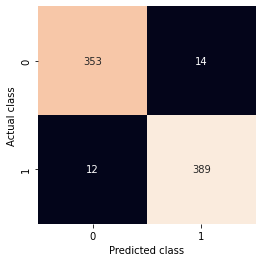

In [70]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
labels = ['0','1']
cf = sns.heatmap(conf_mx,square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
cf.set_xlabel('Predicted class')
cf.set_ylabel('Actual class')

In [71]:
print(f"The precision is: {precision_score(y_train, y_train_pred)}")
print(f"The recall is: {recall_score(y_train, y_train_pred)}")
print(f"F1 is: {f1_score(y_train, y_train_pred)}")

The precision is: 0.9652605459057072
The recall is: 0.970074812967581
F1 is: 0.9676616915422885


In [72]:
forest_clf.fit(X_train,y_train)
y_predict = forest_clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(f"The accuracy on the test set is: {accuracy_score(y_test, y_predict)}")

The accuracy on the test set is: 1.0
